In [1]:
import sys
import os

# Path to the folder containing your module
module_path = os.path.abspath("/Users/bb24144/Documents/QENS_investigation/QENStin/DEPLOY/module")
if module_path not in sys.path:
    sys.path.append(module_path)


import Sprede as sp
import MDAnalysis as mda
import scipp as sc
import numpy as np

In [2]:
u = mda.Universe('Tramp_equil_out_338.data','NVT_338.dcd')

specie = ['1','8','7']
isotopes = ['12C','1H','1H']

/opt/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
time_step = 2.0 * sc.Unit('fs')
step_skip = 1000 * sc.Unit('dimensionless')

z = sp.MDAnalysisParser(universe = u, specie = specie, isotopes = isotopes, time_step = time_step, step_skip=step_skip)


Reading Trajectory: 100%|██████████| 5001/5001 [00:01<00:00, 3941.66it/s]


In [4]:
q_points = z.calculate_q_points(q_max = 2, max_points = 10)

INFO: Pruning at 0.0725 < 2
INFO: Pruned from 2947 q-points to 11


In [5]:
incoh_f = z.calculate_Finc_qt(q_points)

<scipp.Variable> (obs: 5000, atom: 3000, dimension: 3)    float32             [Å]  [-1.79247, 0.952145, ..., 18.5973, -1.99942]


  0%|          | 0/5000 [00:00<?, ?it/s]

[[[-1.7924681   0.9521445  -0.901252  ]
  [-2.1670408   1.4240512  -1.3528512 ]
  [-2.442134    1.4537925   0.24093704]
  ...
  [ 1.6446238   0.37114707 -0.9921276 ]
  [ 3.5517359   0.35616294 -1.8680451 ]
  [ 2.928609    1.1035994   2.8549469 ]]

 [[ 1.2817323   0.34806597  0.9151277 ]
  [ 1.2970064   0.469339    0.669652  ]
  [-0.54371476 -0.44380796  0.8951158 ]
  ...
  [-2.2714407   1.7659203  -0.45899874]
  [-3.849871    2.2794929  -1.0240412 ]
  [-1.6583084   0.44315875 -3.6381216 ]]

 [[-0.7445281  -1.0394799   0.6495461 ]
  [-0.8832763  -1.4059998   0.8210091 ]
  [ 0.43087173 -0.970821    0.51252985]
  ...
  [ 0.50539947  1.7991986   0.8956551 ]
  [ 0.88018584  0.6551175   0.91646814]
  [ 1.0349826   2.0739102   2.4149976 ]]

 ...

 [[ 1.3409338   1.0663872  -1.5010262 ]
  [ 1.6442211   1.3771095  -2.6268387 ]
  [ 0.18490505 -0.46157837 -2.1705627 ]
  ...
  [-1.8830338  -1.2226057  -0.12894869]
  [-1.8267975  -1.0268745  -0.09515238]
  [-1.389431   -0.87947464  0.0609355 ]]

 [

/Users/bb24144/Documents/QENS_investigation/QENStin/DEPLOY/module/Sprede.py:106: ComplexWarning: Casting complex values to real discards the imaginary part
  incoh_f[:, i-1] = np.mean(mean_1 * s_len_sq[:, np.newaxis], axis=0)
  0%|          | 1/5000 [00:05<7:30:20,  5.41s/it]

[[[-5.1073581e-01  1.3002105e+00  1.3875702e-02]
  [-8.7003452e-01  1.8933902e+00 -6.8319917e-01]
  [-2.9858487e+00  1.0099845e+00  1.1360528e+00]
  ...
  [-6.2681705e-01  2.1370673e+00 -1.4511263e+00]
  [-2.9813510e-01  2.6356559e+00 -2.8920863e+00]
  [ 1.2703005e+00  1.5467582e+00 -7.8317475e-01]]

 [[ 5.3720415e-01 -6.9141388e-01  1.5646738e+00]
  [ 4.1373003e-01 -9.3666077e-01  1.4906611e+00]
  [-1.1284304e-01 -1.4146290e+00  1.4076457e+00]
  ...
  [-1.7660414e+00  3.5651188e+00  4.3665636e-01]
  [-2.9696851e+00  2.9346104e+00 -1.0757303e-01]
  [-6.2332582e-01  2.5170689e+00 -1.2231240e+00]]

 [[-1.1945481e+00 -2.3703189e+00  2.2253165e+00]
  [-1.2053514e+00 -3.1410956e+00  2.6827598e+00]
  [ 7.3716879e-01 -2.6169753e+00  1.4207816e+00]
  ...
  [ 5.0790173e-01 -2.9944003e-01  7.9396200e-01]
  [ 1.0564666e+00 -1.7924286e+00  1.1902957e+00]
  [ 1.1445862e+00  1.0849059e+00  3.2313113e+00]]

 ...

 [[ 1.2829595e+00  2.0854225e+00 -1.9599953e+00]
  [ 1.8827517e+00  2.9047432e+00 -3.156

  0%|          | 2/5000 [00:11<7:53:54,  5.69s/it]

[[[-1.2552639   0.26073065  0.6634218 ]
  [-1.7533108   0.48739043  0.13780995]
  [-2.554977    0.03916349  1.6485827 ]
  ...
  [-0.1214176   3.936266   -0.55547124]
  [ 0.58205074  3.2907734  -1.9756181 ]
  [ 2.305283    3.6206684   1.6318228 ]]

 [[ 0.08718419 -2.022253    3.1404443 ]
  [ 0.09165502 -2.6717567   3.3524117 ]
  [ 0.19345403 -3.0607834   2.3158975 ]
  ...
  [-1.7635391   1.4664803   0.33496326]
  [-2.7934043   0.48706433  0.16625452]
  [-0.5137222   1.5280646  -0.40681028]]

 [[-0.0719837  -2.775158    0.78419214]
  [ 0.61957514 -4.4496384   0.78221613]
  [ 1.4141308  -1.7954426  -2.7309828 ]
  ...
  [-0.22923315  0.08182907 -0.38872242]
  [ 0.5399281  -0.8307457  -0.48568058]
  [ 0.6662748   2.300068    0.920518  ]]

 ...

 [[ 2.3008533   1.4081955   0.75416565]
  [ 4.0666265   2.0208588   0.9129944 ]
  [ 2.369091    2.0265732  -3.4133606 ]
  ...
  [-3.966854   -6.4520025  -1.4623537 ]
  [-4.8880386  -6.8090153  -2.6342554 ]
  [-3.5271301  -7.7426662  -1.5563478 ]]

 [

  0%|          | 2/5000 [00:13<9:04:53,  6.54s/it]


KeyboardInterrupt: 

In [8]:
incoh_f.shape

(56, 101)

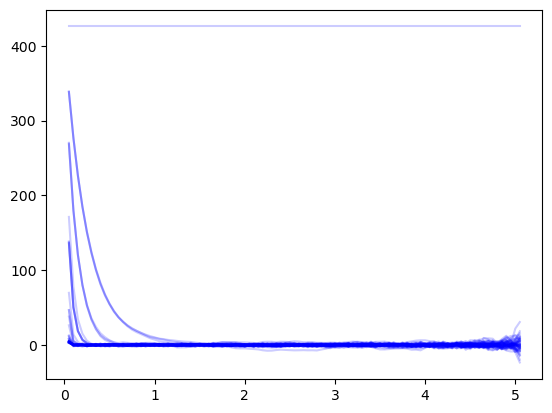

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for i in range(0,len(q_points)):
    ax.plot(z.delta_t/1000000,incoh_f[i].T, 'b', alpha = 0.2)
